In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import csv
import urllib2
import numpy as np
# import zipfile as zp
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importing Energy_and_Water_Data_Disclosure_for_Local_Law_84 Data

In [2]:
url = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
response = urllib2.urlopen(url)
energy = gp.GeoDataFrame.from_csv(response)

# creating simpler variable name for later
energy['BBL'] = energy['NYC Borough, Block, and Lot (BBL)']
energy['EUI'] = energy['Site EUI(kBtu/ft2)']

print energy.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'BBL', u'EUI'],
      dtype='object')


### Importing PLUTO Data

In [3]:
# url2 = 'http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/mn_mappluto_15v1.zip'
# response2 = urllib2.urlopen(url2)
# #  = zp.ZipFile.open(name[, mode[, pwd]])

# zipped = zp.ZipFile(response2, 'r')
# pluto = zipped.open('Manhattan/MNMapPLUTO.shp')

In [4]:
pluto = gp.GeoDataFrame.from_file(os.getenv('PUI2015')+'/HW5/Manhattan/MNMapPLUTO.shp')
print pluto.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [5]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix (energy, s=300, figsize=(12, 12), diagonal='kde')

### Data Cleanup

In [6]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    
fun = np.vectorize(canconvert)

In [7]:
index_units = fun(pluto['UnitsTotal'])
pluto['UnitsTotal'][~index_units] = float('NaN')
pluto['UnitsTotal'] = [float(x) for x in pluto['UnitsTotal']]

index_pbbl = fun(pluto['BBL'])
pluto['BBL'][~index_pbbl] = float('NaN')
pluto['BBL'] = [str(x) for x in pluto['BBL']]

index_area = fun(energy['Reported Property Floor Area (Building(s)) (ft²)'])
energy['Reported Property Floor Area (Building(s)) (ft²)'][~index_area] = float('NaN')
energy['Reported Property Floor Area (Building(s)) (ft²)'] = [float(x) for x in energy['Reported Property Floor Area (Building(s)) (ft²)']]

index_use = fun(energy['EUI'])
energy['EUI'][~index_use] = float('NaN')
energy['EUI'] = [float(x) for x in energy['EUI']]

index_ebbl = fun(energy['BBL'])
energy['BBL'][~index_ebbl] = float('NaN')
energy['BBL'] = [str(x) for x in energy['BBL']]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: SettingWithCopyWarning

In [8]:
# print energy.EUI
# print energy.BBL
# print energy['Reported Property Floor Area (Building(s)) (ft²)']
# print pluto.BBL
# print pluto.UnitsTotal

###Merging the two data sets using the BBL

In [9]:
joined = pd.merge(energy,pluto,on=['BBL'],how='inner')
len(joined.BBL)

//anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
//anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


6545

In [10]:
# creating array with total consumption/building
total = []
total = joined.EUI.values*joined['Reported Property Floor Area (Building(s)) (ft²)'].values

# creating array with units/building
units = []
units = joined.UnitsTotal.values

//anaconda/lib/python2.7/site-packages/pandas/core/index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


### Additional cleanup - removing outliers

In [11]:
index_clean = (units>0)&(units<4000)&(total>1000)&(total<1e11)

print index_clean

[ True  True  True ..., False False False]


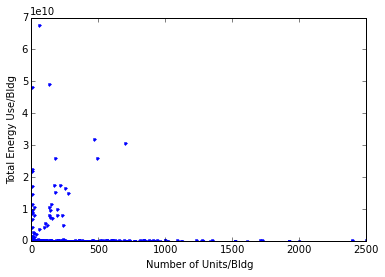

In [12]:
pl.plot(units[index_clean], total[index_clean], '.')
pl.xlabel('Number of Units/Bldg')
pl.ylabel('Total Energy Use/Bldg')

###Finding linear regression model

####Statsmodel OLS

In [13]:
X = sm.add_constant(np.log10(units[index_clean]))
# print X
mmod = sm.OLS(np.log10(total[index_clean]), X, missing='drop').fit() # ignores entires where x or y is NaN
print mmod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     58.94
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           1.94e-14
Time:                        15:18:05   Log-Likelihood:                -3848.6
No. Observations:                5002   AIC:                             7701.
Df Residuals:                    5000   BIC:                             7714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.9178      0.019    359.148      0.0

#### Numpy polyfit

[  2.68002739e+05   1.15362632e+08]


(1000, 1000000000.0)

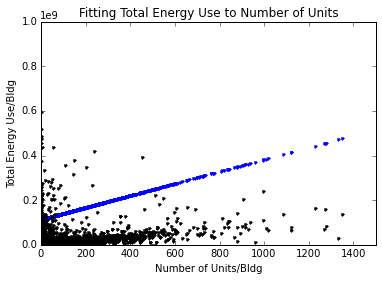

In [14]:
poly = np.polyfit(units[index_clean],total[index_clean],1)
print poly

p = np.poly1d(poly)

pl.xlabel('Number of Units/Bldg')
pl.ylabel('Total Energy Use/Bldg')
pl.title('Fitting Total Energy Use to Number of Units')
pl.plot(units[index_clean], p(units[index_clean]), '.')
pl.plot(units[index_clean], total[index_clean], '.', color='black')
pl.xlim((0,1500))
pl.ylim((1000,.1e10))

[  2.18706921e-09   1.08046034e+02]


(1000, 1000000000.0)

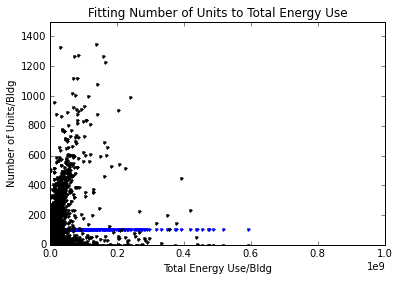

In [15]:
oly = np.polyfit(total[index_clean],units[index_clean],1)
print oly

o = np.poly1d(oly)

pl.xlabel('Total Energy Use/Bldg')
pl.ylabel('Number of Units/Bldg')
pl.title('Fitting Number of Units to Total Energy Use')
pl.plot(total[index_clean], o(total[index_clean]), '.')
pl.plot(total[index_clean], units[index_clean], '.', color='black')
pl.ylim((0,1500))
pl.xlim((1000,.1e10))

#### Scipy linregress

In [16]:
# import scipy as sc
# sc.stats.linregress(units[index_clean],total[index_clean])

#####Which is better? 
Fitting the total energy use (y-axis) to the number of units (x-axis) creates a better fit than the other way around. It makes more sense for the number of units to be the indepenent variable, because the number of units is tied to the number of energy users.

#####Could you do a likelihood ratio test here? why or why not??
The likelihood ratio test is not appropriate here because there is only one degree of freedom and this log-likelihood uses a chi-squared distribution.


###Creating a second degree polynomial fit -- ax^2+bx+c

(1000, 1000000000.0)

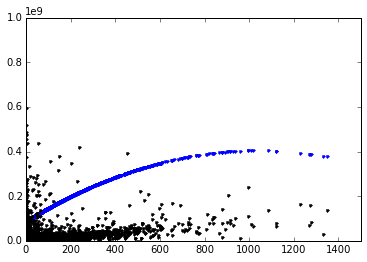

In [17]:
poly2 = np.polyfit(units[index_clean], total[index_clean], 2)

p2 = np.poly1d(poly2)

plot(units[index_clean], p2(units[index_clean]), '.')
pl.plot(units[index_clean], total[index_clean], '.', color='black')
pl.xlim((0,1500))
pl.ylim((1000,.1e10))

#####Which is better?

The second dregree polynomial is a better fit compared to the straight line. Ultimatlely, neither of the lines seem to fit the data very well. This may mean that there are multiple trends in the data which need to be separated in order for it to accurately modeled using these parameters.

#####Could you do a likelihood ratio test here? Why or why not??
The likelihood ratio test can be performed now because there are degrees of freedom, from the second degree polynomial.